In [28]:
import pandas as pd
import os
import matplotlib.pyplot as plt
dir = 'results/results/'
files = os.listdir(dir)
files = [file for file in files if file.endswith('.csv')]


In [39]:
def format_df(df):
    df['lm_acc'] = df['lm_pred'] == df['label']
    df['dtree_acc'] = df['dtree_pred'] == df['label']
    df['true_dtree_acc'] = df['true_dtree_pred'] == df['label']
    df['lm_sim'] = df['lm_pred'] == df['true_dtree_pred']
    df['dtree_sim'] = df['dtree_pred'] == df['true_dtree_pred']
    df = df.groupby('train_size').mean()
    return df

def make_acc_plot(df):
    df = format_df(df)
    plt.figure(figsize=(10,6))  # Optional: You can adjust the figure size
    plt.grid(True, which='both', linestyle='-', linewidth=0.5)  # Adding a grid

    # Using red for the 'LM DTree' and blue for the 'DTree'
    plt.plot(df.index, df['lm_acc'], label='LM DTree', color='red', marker='o')
    plt.plot(df.index, df['dtree_acc'], label='DTree', color='blue', marker='o')
    plt.plot(df.index, df['true_dtree_acc'], label='True DTree', color='green', marker='o')

    plt.xlabel('Training Size')  # Labeling x-axis
    plt.xscale('log', base=2)
    plt.xticks(df.index, df.index)
    plt.ylabel('Accuracy')  # Labeling y-axis

    plt.legend()
    plt.tight_layout()  # Adjusts the plot to fit better
    return plt

def make_sim_plot(df):
    df = format_df(df)
    # Assuming df is your DataFrame
    plt.figure(figsize=(10,6))  # Optional: You can adjust the figure size
    plt.grid(True, which='both', linestyle='-', linewidth=0.5)  # Adding a grid

    # Using red for the 'LM DTree' and blue for the 'DTree'
    plt.plot(df.index, df['lm_sim'], label='LM DTree', color='red', marker='o')
    plt.plot(df.index, df['dtree_sim'], label='DTree', color='blue', marker='o')

    plt.title('Decision Tree Similarity Comparison')  # Optional: Adding a title
    plt.xlabel('Training Size')  # Labeling x-axis
    plt.xscale('log', base=2)
    plt.xticks(df.index, df.index)
    plt.ylabel('Accuracy')  # Labeling y-axis

    plt.legend()
    plt.tight_layout()  # Adjusts the plot to fit better
    return plt


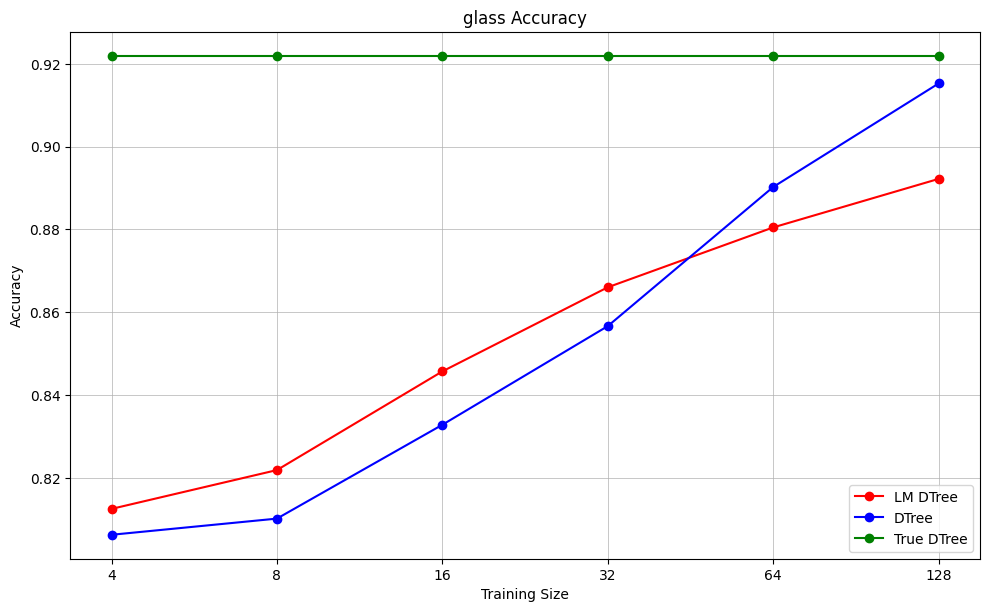

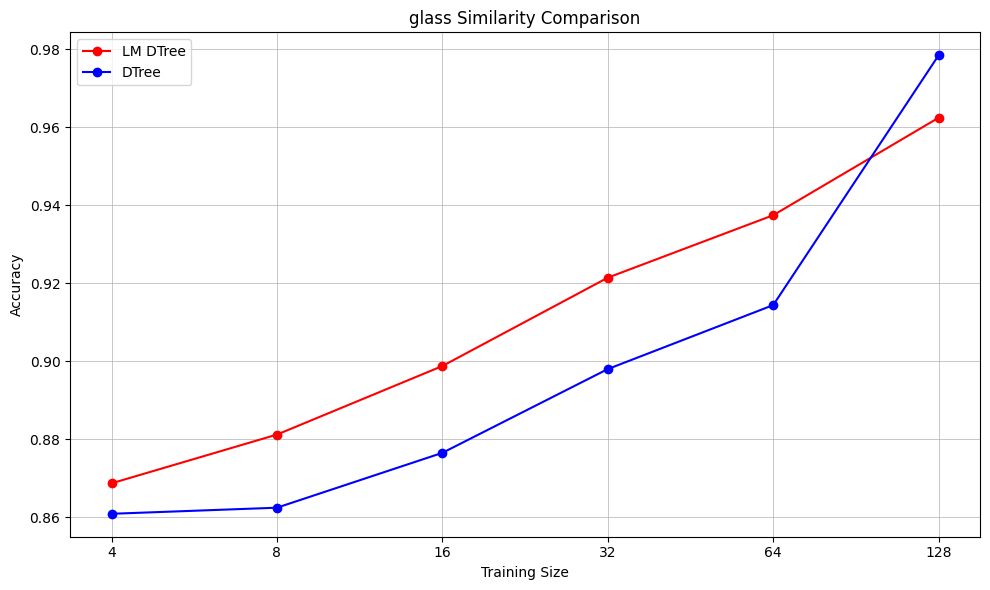

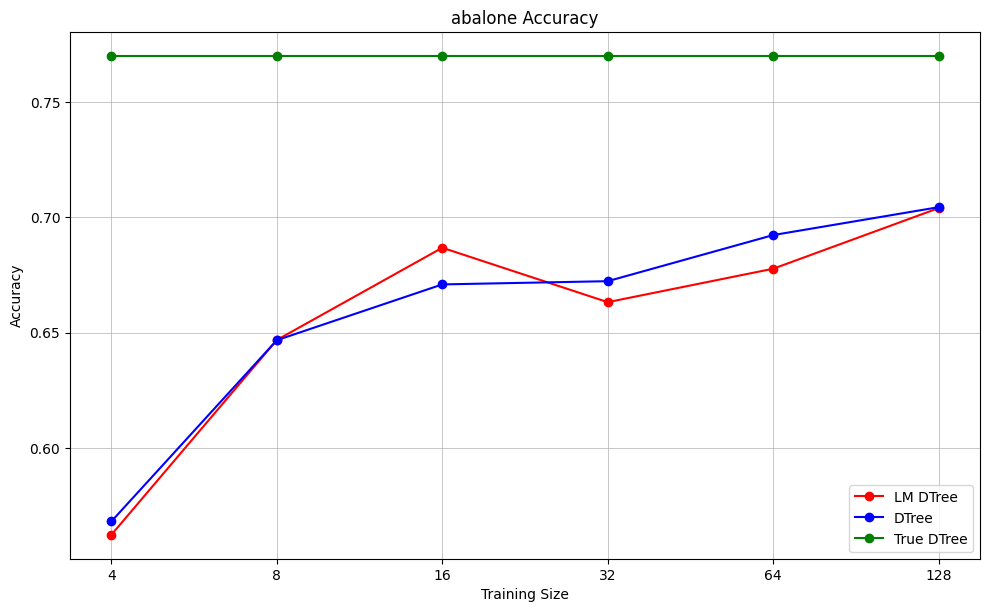

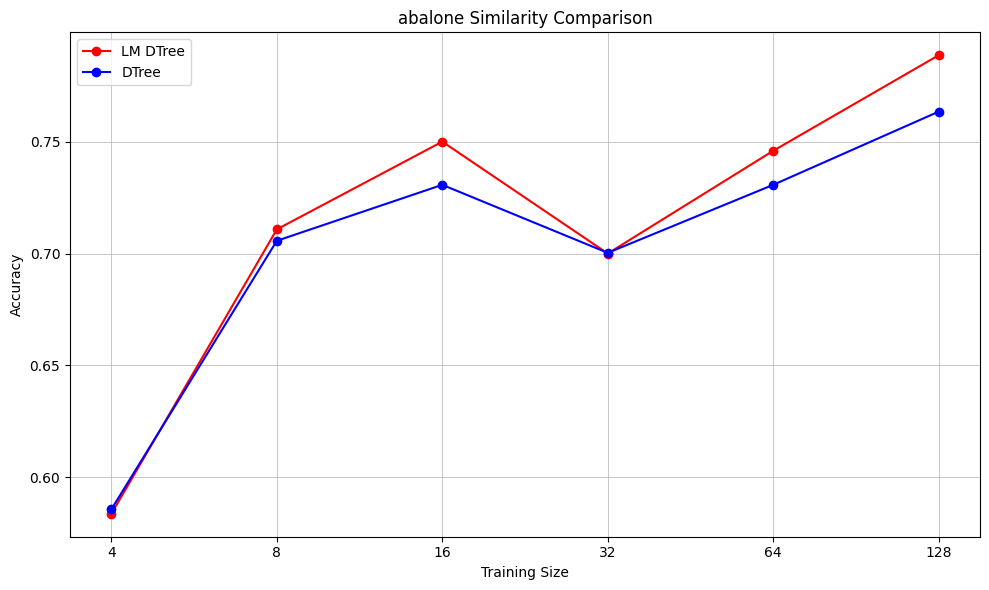

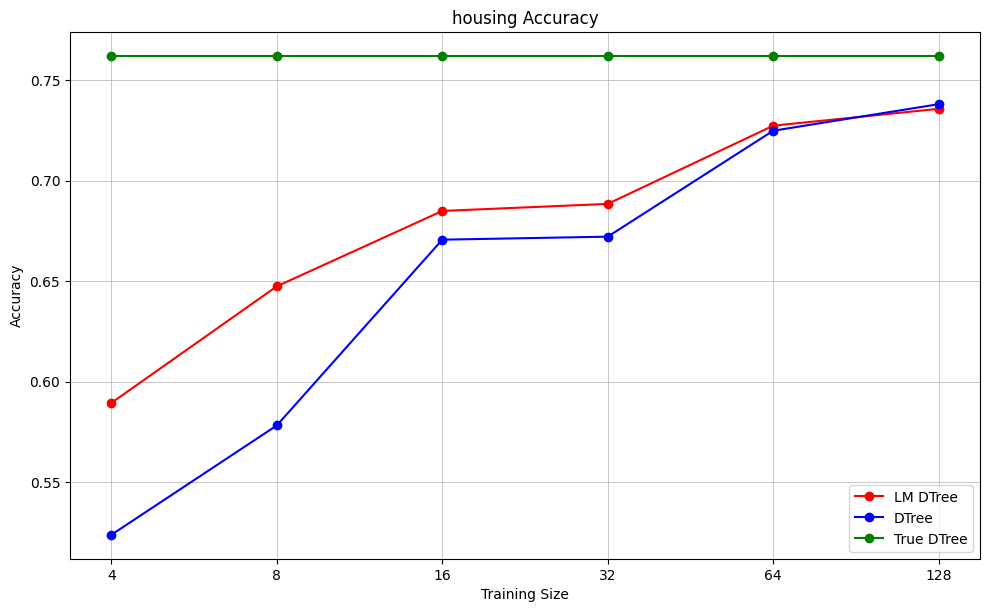

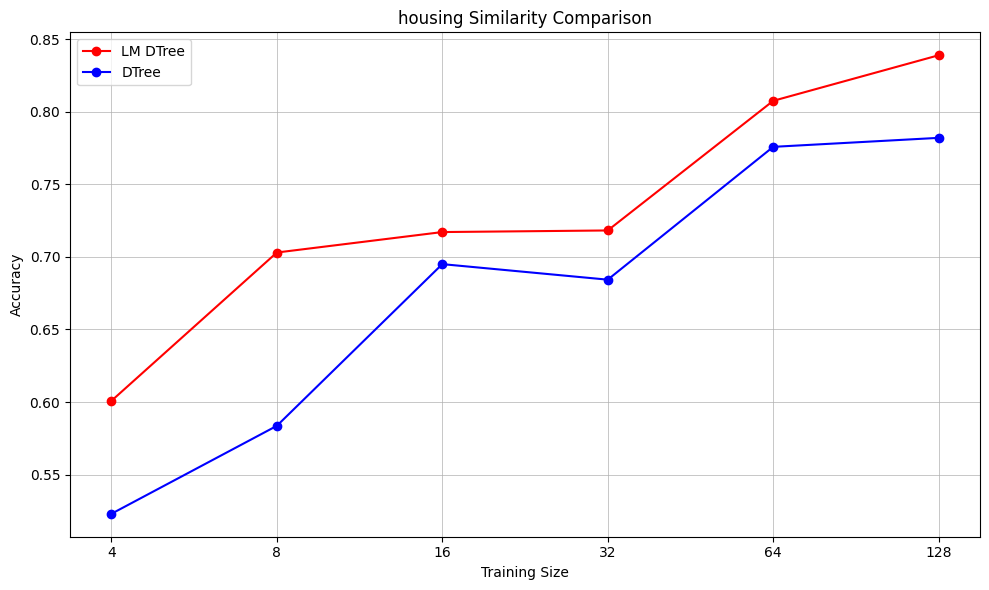

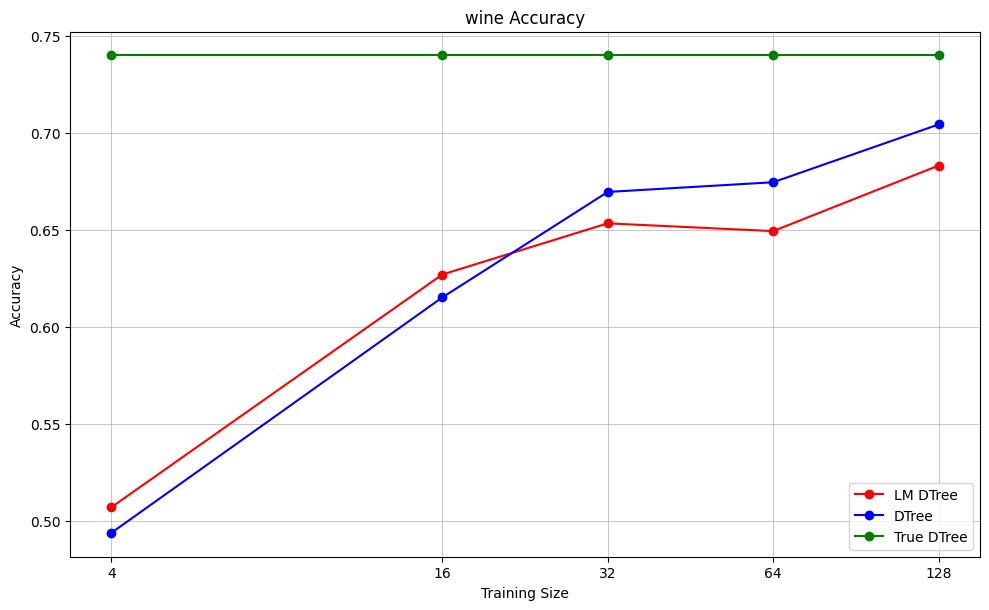

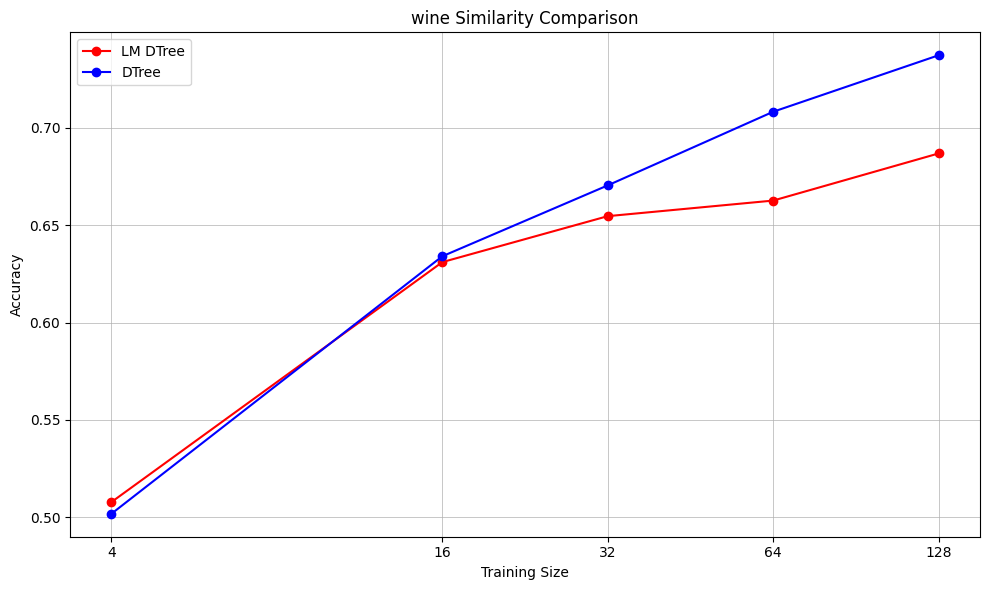

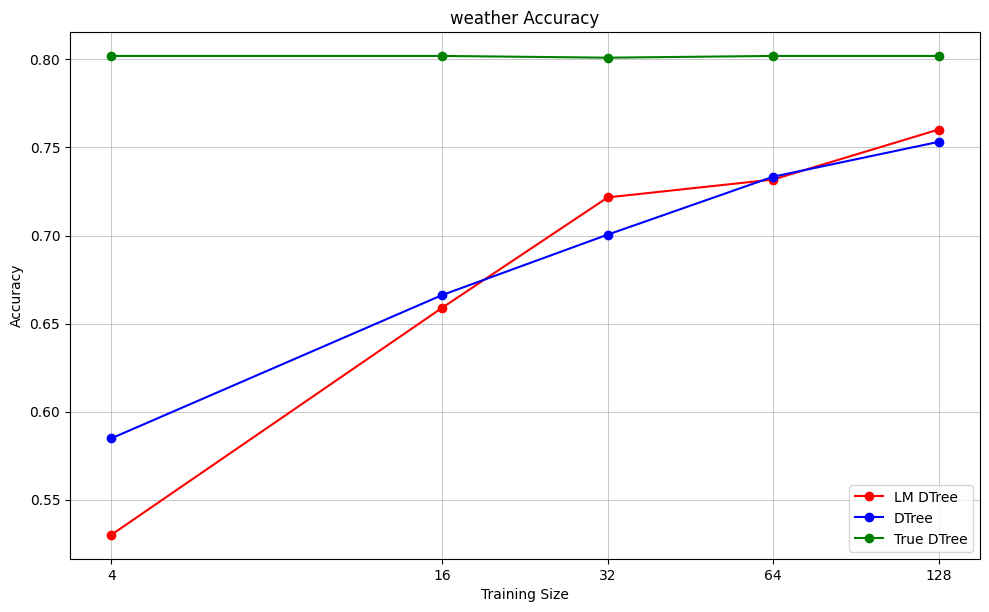

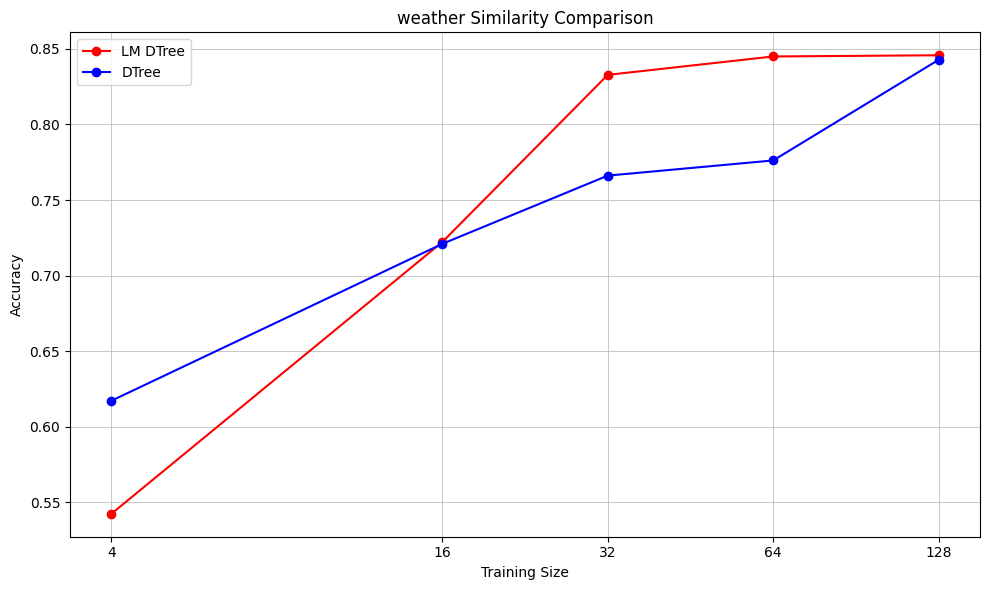

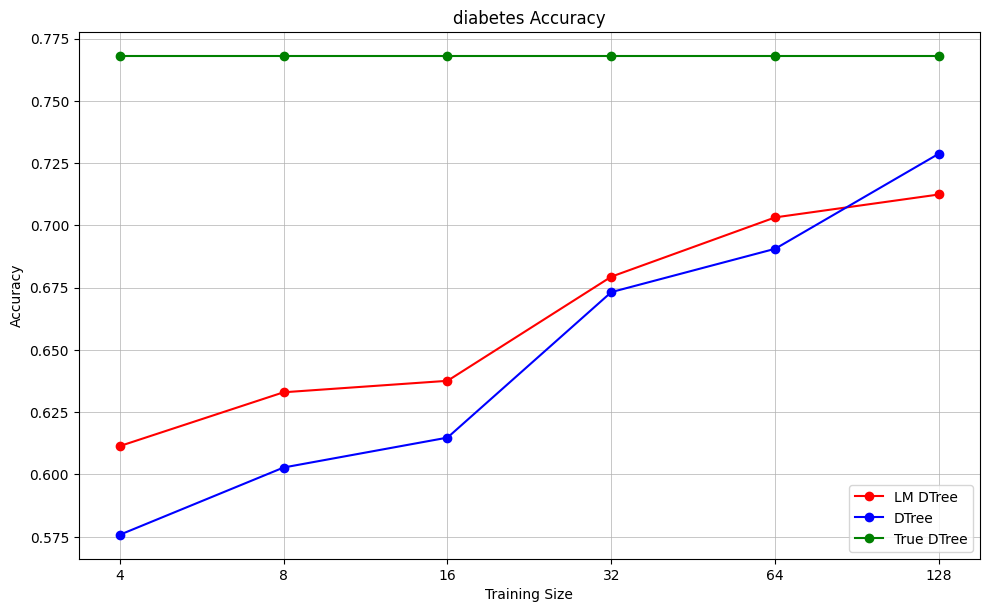

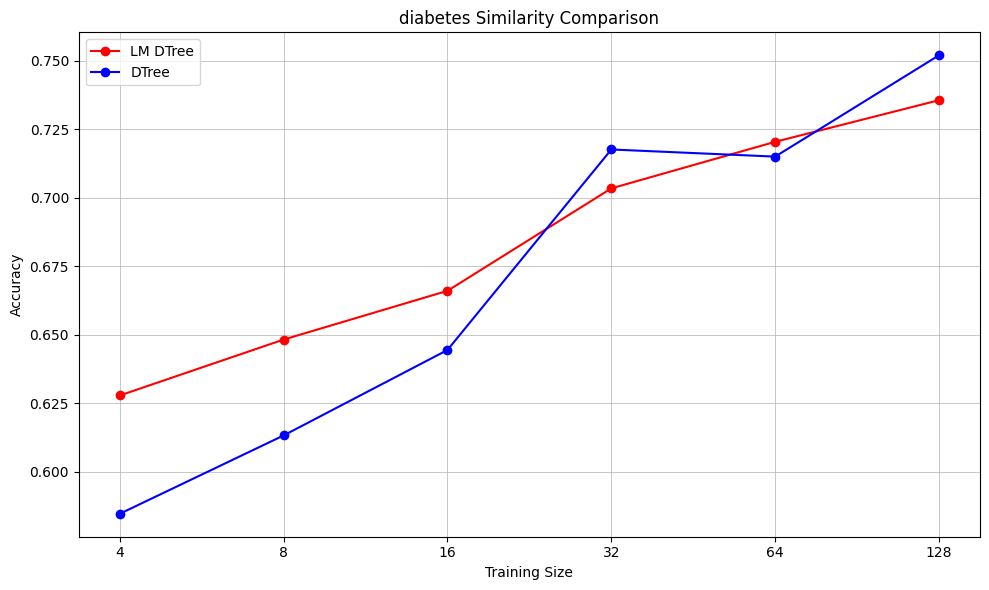

In [42]:
for file in files:
    df = pd.read_csv(dir + file)
    acc_plot = make_acc_plot(df)
    name = file.split('.')[0] + '-accuracy'
    title = file.split('.')[0] + ' Accuracy'
    plt.title(title)
    plt.savefig('results/plots/accuracy/' + name + '.png')
    plt.show()
    sim_plot = make_sim_plot(df)
    name = file.split('.')[0] + '-similarity'
    title = file.split('.')[0] + ' Similarity Comparison'
    plt.title(title)
    plt.savefig('results/plots/similarity/' + name + '.png')
    plt.show()
    

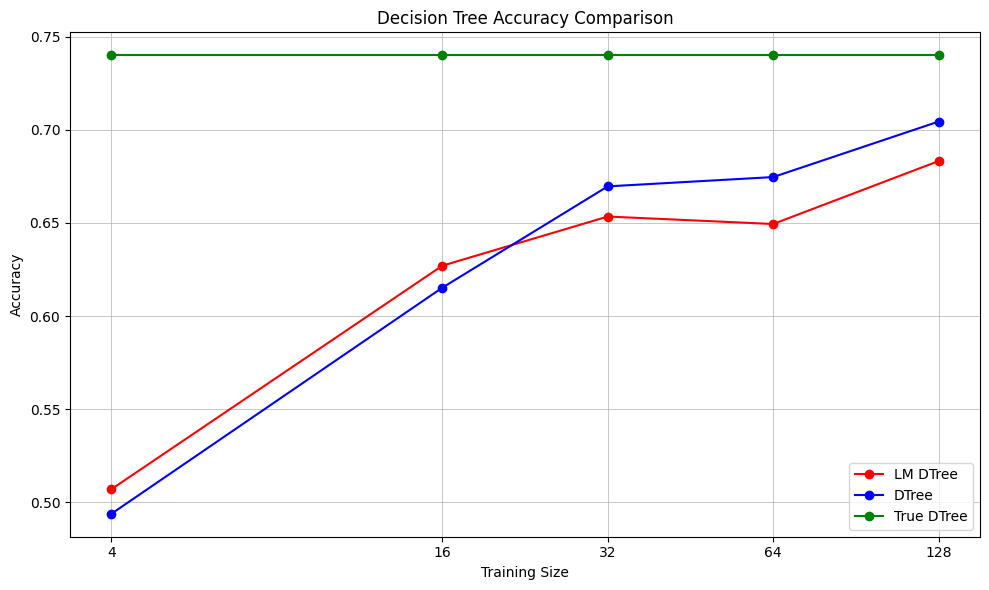

In [23]:
file = files[1]
df = pd.read_csv(dir + file)
df
plot = make_plot(df)
plot.show()